# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [108]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [109]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [110]:
data.shape

(5391, 6)

In [111]:
data.isna().values.any()

False

In [112]:
data_dedupe = data.drop_duplicates()
data_dedupe.shape == data.shape

True

In [113]:
for col in data.columns:
    first_entry = data[col][0]
    print(type(first_entry))

<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.

Note that *domestic* in this context refers to the United States.

In [115]:
for col in ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']:
    data[col] = data[col].astype(str).str.replace(',', '')
    data[col] = data[col].astype(str).str.replace('$', '')
    data[col] = pd.to_numeric(data[col])

/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [116]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [117]:
# What is the average production budget of the films in the data set?

mean_budget = data['USD_Production_Budget'].mean()
'$' + '{:,.2f}'.format(mean_budget)

'$31,113,737.58'

In [118]:
# What is the average worldwide gross revenue of films?
mean_worldwide_revenue = data['USD_Worldwide_Gross'].mean()
'$' + '{:,.2f}'.format(mean_worldwide_revenue)

'$88,855,421.96'

In [119]:
# What were the minimums for worldwide and domestic revenue?
min_worldwide_revenue = data['USD_Worldwide_Gross'].min()
print('$', '{:,.2f}'.format(min_worldwide_revenue))

min_domestic_revenue = data['USD_Domestic_Gross'].min()
print('$', '{:,.2f}'.format(min_domestic_revenue))

$ 0.00
$ 0.00


In [120]:
# Are the bottom 25% of films actually profitable or do they lose money?

data['Profit'] = data['USD_Worldwide_Gross'] - data['USD_Production_Budget']

profitability = data.sort_values('Profit').reset_index(drop=True)
print('The 25th percentile movie is not profitable')

quarter_percentile = len(data)//4
profitability.loc[quarter_percentile]

The 25th percentile movie is not profitable


Rank                                    1391
Release_Date             1995-09-22 00:00:00
Movie_Title                        Showgirls
USD_Production_Budget               40000000
USD_Worldwide_Gross                 37750754
USD_Domestic_Gross                  20350754
Profit                              -2249246
Name: 1347, dtype: object

In [121]:
# What are the highest production budget and highest worldwide gross revenue of any film?
max_budget = data['USD_Production_Budget'].max()
print('$', '{:,.2f}'.format(max_budget))

max_worldwide_revenue = data['USD_Worldwide_Gross'].max()
print('$', '{:,.2f}'.format(max_worldwide_revenue))

$ 425,000,000.00
$ 2,783,918,982.00


In [122]:
# How much revenue did the lowest and highest budget films make?
max_budget = data['USD_Production_Budget'].max()
max_budget_idx = data['USD_Production_Budget'].idxmax()
max_budget_name = data['Movie_Title'][max_budget_idx]
rev_of_max_budget = data['USD_Worldwide_Gross'][max_budget_idx]
print(f'{max_budget_name} cost ${"{:,.2f}".format(max_budget)} and made ${"{:,.2f}".format(rev_of_max_budget)}')

min_budget = data['USD_Production_Budget'].min()
min_budget_idx = data['USD_Production_Budget'].idxmin()
min_budget_name = data['Movie_Title'][min_budget_idx]
rev_of_min_budget = data['USD_Worldwide_Gross'][min_budget_idx]
print(f'{min_budget_name} cost ${"{:,.2f}".format(min_budget)} and made ${"{:,.2f}".format(rev_of_min_budget)}')

Avatar cost $425,000,000.00 and made $2,783,918,982.00
My Date With Drew cost $1,100.00 and made $181,041.00


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [123]:
no_domestic_gross = data[data['USD_Domestic_Gross']==0]
print(f'{len(no_domestic_gross)} films had $0 domestic gross')

no_domestic_gross.sort_values('USD_Production_Budget', ascending=False)

512 films had $0 domestic gross


Rank Release_Date                         Movie_Title  \
5388    96   2020-12-31                         Singularity   
5387   126   2018-12-18                             Aquaman   
5384   321   2018-09-03                   A Wrinkle in Time   
5385   366   2018-10-08                      Amusement Park   
5090   556   2015-12-31  Don Gato, el inicio de la pandilla   
...    ...          ...                                 ...   
4787  5371   2014-12-31                Stories of Our Lives   
3056  5374   2007-12-31                         Tin Can Man   
4907  5381   2015-05-19                    Family Motocross   
5006  5389   2015-09-29             Signed Sealed Delivered   
5007  5390   2015-09-29                A Plague So Pleasant   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  \
5388              175000000                    0                   0   
5387              160000000                    0                   0   
5384              103000000                    0                   0   
5385              100000000                    0                   0   
5090               80000000              4547660                   0   
...                     ...                  ...                 ...   
4787                  15000                    0                   0   
3056                  12000                    0                   0   
4907                  10000                    0                   0   
5006                   5000                    0                   0   
5007                   1400                    0                   0   

         Profit  
5388 -175000000  
5387 -160000000  
5384 -103000000  
5385 -100000000  
5090  -75452340  
...         ...  
4787     -15000  
3056     -12000  
4907     -10000  
5006      -5000  
5007      -1400  

[512 rows x 7 columns]

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [124]:
no_world_gross = data[data['USD_Worldwide_Gross']==0]
print(f'{len(no_world_gross)} films had $0 domestic gross')

no_world_gross.sort_values('USD_Production_Budget', ascending=False)

357 films had $0 domestic gross


Rank Release_Date              Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31              Singularity              175000000   
5387   126   2018-12-18                  Aquaman              160000000   
5384   321   2018-09-03        A Wrinkle in Time              103000000   
5385   366   2018-10-08           Amusement Park              100000000   
5058   880   2015-11-12         The Ridiculous 6               60000000   
...    ...          ...                      ...                    ...   
4787  5371   2014-12-31     Stories of Our Lives                  15000   
3056  5374   2007-12-31              Tin Can Man                  12000   
4907  5381   2015-05-19         Family Motocross                  10000   
5006  5389   2015-09-29  Signed Sealed Delivered                   5000   
5007  5390   2015-09-29     A Plague So Pleasant                   1400   

      USD_Worldwide_Gross  USD_Domestic_Gross     Profit  
5388                    0                   0 -175000000  
5387                    0                   0 -160000000  
5384                    0                   0 -103000000  
5385                    0                   0 -100000000  
5058                    0                   0  -60000000  
...                   ...                 ...        ...  
4787                    0                   0     -15000  
3056                    0                   0     -12000  
4907                    0                   0     -10000  
5006                    0                   0      -5000  
5007                    0                   0      -1400  

[357 rows x 7 columns]

### Filtering on Multiple Conditions

In [125]:
international_releases = data.loc[
    (data.USD_Domestic_Gross == 0) &
    (data.USD_Worldwide_Gross != 0)]
international_releases

Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross    Profit  
71                   3220                   0  -3376780  
1579                 7890                   0   -492110  
1744             10834406                   0   3334406  
2155                63180                   0  -3936820  
2203              5918742                   0 -14081258  
...                   ...                 ...       ...  
5340              1480089                   0 -34519911  
5348             58807172                   0  35807172  
5360                27561                   0  -1072439  
5372             48048527                   0  18048527  
5374                36630                   0  -3963370  

[155 rows x 7 columns]

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [126]:
data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   
...    ...          ...                      ...                    ...   
5340  1506   2017-04-14      Queen of the Desert               36000000   
5348  2225   2017-05-05        Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03                Departure                1100000   
5372  1856   2017-08-25                Ballerina               30000000   
5374  4237   2017-08-25     Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross    Profit  
71                   3220                   0  -3376780  
1579                 7890                   0   -492110  
1744             10834406                   0   3334406  
2155                63180                   0  -3936820  
2203              5918742                   0 -14081258  
...                   ...                 ...       ...  
5340              1480089                   0 -34519911  
5348             58807172                   0  35807172  
5360                27561                   0  -1072439  
5372             48048527                   0  18048527  
5374                36630                   0  -3963370  

[155 rows x 7 columns]

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [127]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
data_clean = data[data['Release_Date']<scrape_date]

not_released = data[data['Release_Date']>scrape_date]
print(f'{len(not_released)} films were not yet released at the time of this scrape')
not_released

7 films were not yet released at the time of this scrape


Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  \
5384              103000000                    0                   0   
5385              100000000                    0                   0   
5386               15000000                    0                   0   
5387              160000000                    0                   0   
5388              175000000                    0                   0   
5389               50000000                    0                   0   
5390               20000000                    0                   0   

         Profit  
5384 -103000000  
5385 -100000000  
5386  -15000000  
5387 -160000000  
5388 -175000000  
5389  -50000000  
5390  -20000000

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [128]:
len(data_clean[data_clean['Profit']<0]) / len(data_clean)

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

[(0.0, 3000000000.0),
 (0.0, 550000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions')]

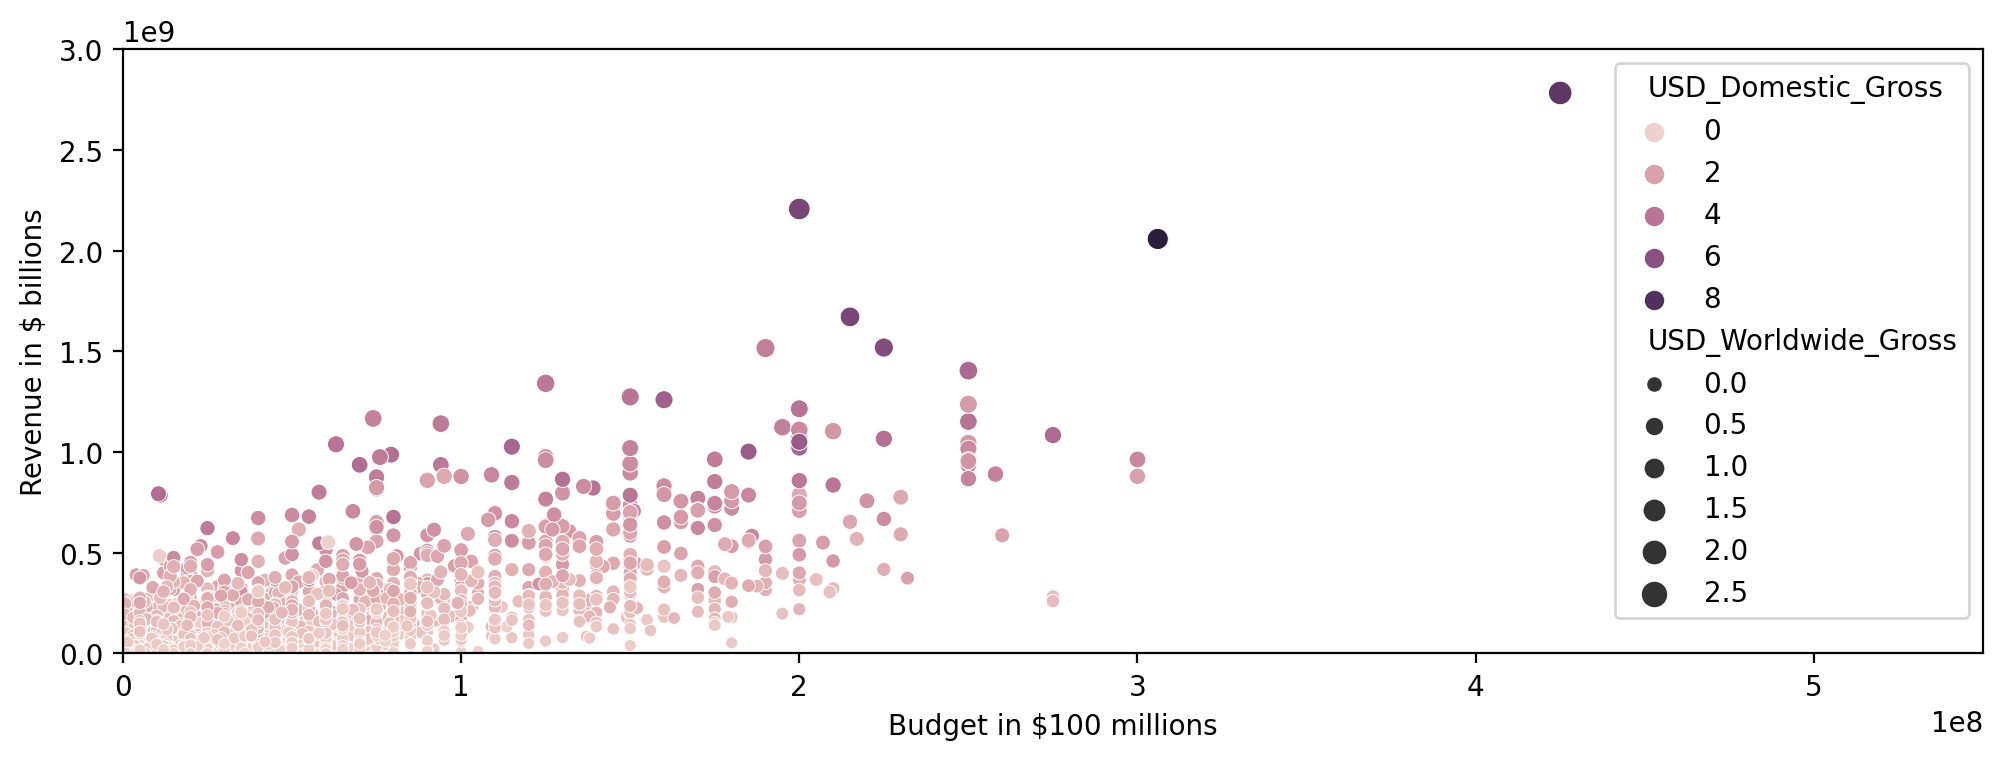

In [136]:
plt.figure(figsize=(12,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Domestic_Gross',
                     size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3_000_000_000), xlim=(0, 550_000_000),
       ylabel='Revenue in $ billions', xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



[(0.0, 450000000.0),
 (-20089.0, 18262.0),
 Text(0, 0.5, 'Budget in $100 millions'),
 Text(0.5, 0, 'Year')]

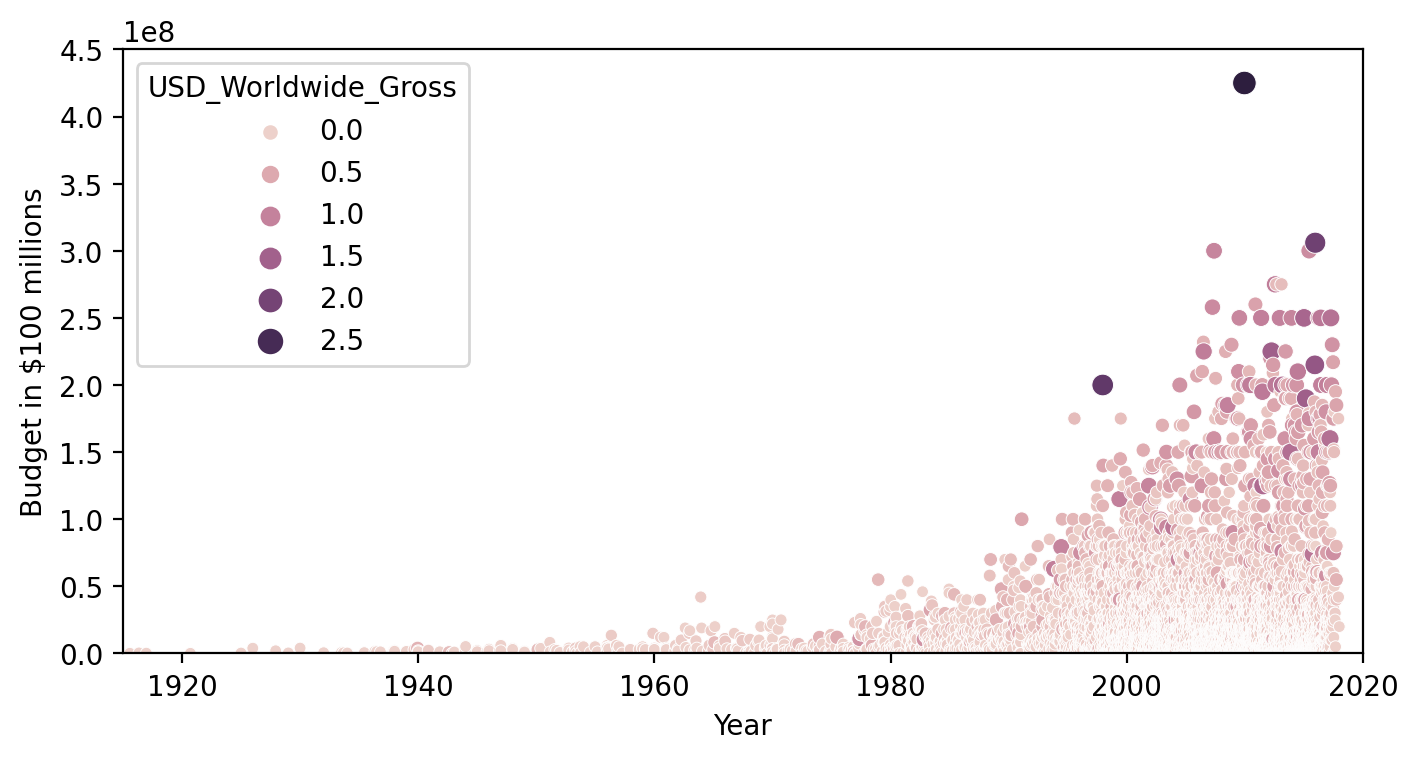

In [140]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='Release_Date',
                     y='USD_Production_Budget',
                     hue='USD_Worldwide_Gross',
                     size='USD_Worldwide_Gross')

ax.set(ylim=(0, 450_000_000), xlim=(pd.Timestamp('1915'), pd.Timestamp('2020')), ylabel='Budget in $100 millions', xlabel='Year')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [148]:
years = [date.year for date in data_clean['Release_Date']]
years

[1915,
 1916,
 1916,
 1920,
 1925,
 1925,
 1927,
 1929,
 1930,
 1931,
 1933,
 1933,
 1933,
 1934,
 1935,
 1936,
 1936,
 1936,
 1937,
 1938,
 1938,
 1939,
 1939,
 1939,
 1940,
 1940,
 1940,
 1941,
 1942,
 1942,
 1943,
 1943,
 1944,
 1944,
 1945,
 1945,
 1945,
 1946,
 1946,
 1946,
 1946,
 1947,
 1948,
 1948,
 1949,
 1949,
 1950,
 1950,
 1951,
 1951,
 1951,
 1951,
 1951,
 1952,
 1952,
 1952,
 1953,
 1953,
 1953,
 1953,
 1953,
 1953,
 1954,
 1954,
 1954,
 1955,
 1955,
 1956,
 1956,
 1956,
 1956,
 1956,
 1956,
 1956,
 1956,
 1956,
 1956,
 1957,
 1957,
 1957,
 1958,
 1959,
 1959,
 1959,
 1959,
 1960,
 1960,
 1960,
 1960,
 1960,
 1961,
 1961,
 1961,
 1961,
 1961,
 1962,
 1962,
 1962,
 1962,
 1962,
 1962,
 1962,
 1963,
 1963,
 1963,
 1963,
 1963,
 1963,
 1963,
 1963,
 1964,
 1964,
 1964,
 1964,
 1964,
 1964,
 1964,
 1965,
 1965,
 1965,
 1965,
 1965,
 1965,
 1966,
 1966,
 1966,
 1966,
 1967,
 1967,
 1967,
 1967,
 1967,
 1967,
 1967,
 1968,
 1968,
 1968,
 1968,
 1968,
 1968,
 1968,
 1968,
 1968,

In [149]:
decades = [year//10*10 for year in years]
decades

[1910,
 1910,
 1910,
 1920,
 1920,
 1920,
 1920,
 1920,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1930,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1940,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1950,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,
 1960,

In [150]:
data_clean['Decade'] = decades

/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [153]:
old_films = data_clean.query('Decade < 1970')
new_films = data_clean.query('Decade >= 1970')

print(f'There were {len(old_films)} movies made before 1970 and {len(new_films)} made after.')

There were 153 movies made before 1970 and 5231 made after.


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 